# Ingeniería de características - implementación de un proceso

## Introducción
La ingeniería de características es un proceso que se utiliza para seleccionar y transformar variables teniendo algunos puntos como la extracción, limpieza, transformación y selección de nuestros datos será la piedra angular en nuestro procesos de ciencia de datos.

## Problemática 
El presupuesto para la nación siempre así un tema muy controversial, el uso de los recursos enfocados a un área o problema en específico, administrados correcta, debería ser una imagen del crecimiento (mejora de condiciones de área) en los sectores de inversión especificados. Lo que viene a preguntarnos, ¿los recursos han sido eficientemente administrados?, ¿han tenido algún impacto durante su gestión en el área enfocada?, nosotros trataremos de dar una vista muy global sobre educación comparando los recursos implementados durante los años.

Es importante aclarar que estos problemas son sistémicos e intervienen muchas otras variables para tener una conclusión precisa y una mejor comprensión del problema que por cuestiones de enfoque no entraremos en materia, por lo que solamente consideraremos el presupuesto implementado contra datos educación. 

In [16]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


path_edu = './tidy_data/educacion_tidy.csv'
path_presu = './tidy_data/presupuesto_tidy.csv'

df_edu = pd.read_csv(path_edu)

df_presu = pd.read_csv(path_presu)

df_edu['Fecha'] = df_edu['Fecha'].astype('category')
df_presu['CICLO'] = df_presu['CICLO'].astype('category')

In [5]:
df_presu

,CICLO,DESC_TIPOGASTO,MONTO_APROBADO,MONTO_EJERCICIO
0,2008,Gasto corriente,1.619434e+11,0.000000e+00
1,2008,Gasto de capital diferente de obra pública,8.656397e+09,0.000000e+00
2,2008,Gasto de obra pública,2.898005e+09,0.000000e+00
3,2009,Gasto corriente,1.904939e+11,0.000000e+00
4,2009,Gasto de capital diferente de obra pública,3.834694e+09,0.000000e+00
5,2009,Gasto de obra pública,6.601937e+09,0.000000e+00
6,2010,Gasto corriente,2.007101e+11,0.000000e+00
7,2010,Gasto corriente por concepto de gastos indirec...,1.913210e+09,0.000000e+00
8,2010,Gasto de capital diferente de obra pública,3.527667e+09,0.000000e+00
9,2010,Gasto de inversión por concepto de gastos indi...,1.875891e+08,0.000000e+00


In [6]:
# Union de dos dataset para compara el nivel de alfavetizacion con el presupuesto nacional a nivel global
df_edu_tojoijn = df_edu[['Fecha','Alfabetización, total de adultos (% personas 15 o más)']].groupby('Fecha')['Alfabetización, total de adultos (% personas 15 o más)'].sum().reset_index(name ='Taza Alfabe')
df_edu_tojoijn

,Fecha,Taza Alfabe
0,2008,92.925598
1,2009,93.441879
2,2010,93.068939
3,2011,93.519981
4,2012,94.228401
5,2013,93.962852
6,2014,94.555878
7,2015,94.472282
8,2016,94.859619
9,2017,94.972778


In [7]:
df_presu_tojoijn = df_presu[['CICLO','MONTO_APROBADO']].groupby('CICLO')['MONTO_APROBADO'].sum().reset_index(name ='Total')
df_presu_tojoijn

,CICLO,Total
0,2008,1.734978e+11
1,2009,2.009306e+11
2,2010,2.111862e+11
3,2011,2.306846e+11
4,2012,2.517646e+11
5,2013,2.602772e+11
6,2014,2.925488e+11
7,2015,3.050571e+11
8,2016,3.029866e+11
9,2017,2.676552e+11


In [18]:
result = pd.merge(df_presu_tojoijn, df_edu_tojoijn, left_on=['CICLO'], right_on=['Fecha'])
result

,CICLO,Total,Fecha,Taza Alfabe
0,2008,1.734978e+11,2008,92.925598
1,2009,2.009306e+11,2009,93.441879
2,2010,2.111862e+11,2010,93.068939
3,2011,2.306846e+11,2011,93.519981
4,2012,2.517646e+11,2012,94.228401
5,2013,2.602772e+11,2013,93.962852
6,2014,2.925488e+11,2014,94.555878
7,2015,3.050571e+11,2015,94.472282
8,2016,3.029866e+11,2016,94.859619
9,2017,2.676552e+11,2017,94.972778


In [55]:
result_melt = pd.melt(result, id_vars=['CICLO'], value_vars=['Total', 'Taza Alfabe'], ignore_index=False)

### Grafica de presupuesto a educacion publica anual

Text(0.5, 0, 'Fecha')

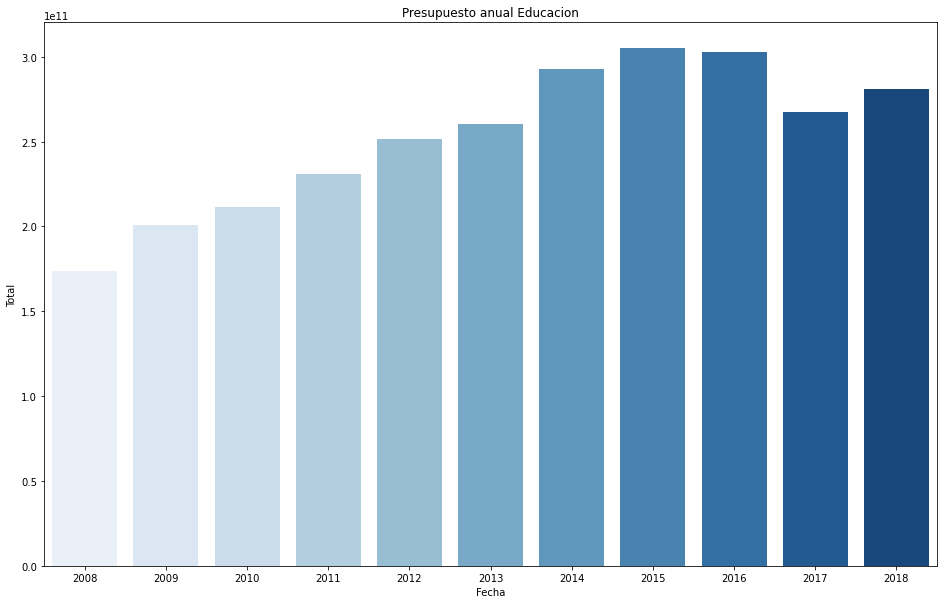

In [63]:
fig, ax = plt.subplots(figsize = (16, 10))
ax = sns.barplot(x="CICLO", y="Total", data=result, alpha = 1,  palette="Blues", capsize=1)
plt.title('Presupuesto anual Educacion')
plt.xticks(rotation =0)
plt.xlabel('Fecha')


### Grafica de taza de alfabetizacion anual

Text(0.5, 0, 'Fecha')

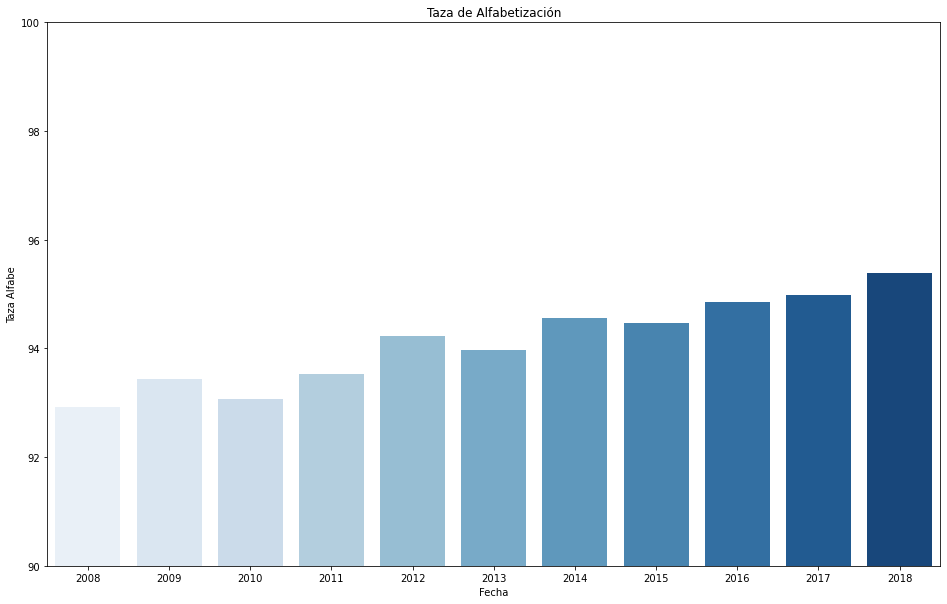

In [66]:
fig, ax = plt.subplots(figsize = (16, 10))
ax1=sns.barplot(x="CICLO", y="Taza Alfabe", data=result, alpha = 1,  palette="Blues", capsize=1)
plt.title('Taza de Alfabetización')
ax1.axes.set_ylim(90,100)
plt.xticks(rotation =0)
plt.xlabel('Fecha')


In [67]:
df_new = result.drop(['Fecha'],axis=1)

,CICLO,Total,Taza Alfabe
0,2008,1.734978e+11,92.925598
1,2009,2.009306e+11,93.441879
2,2010,2.111862e+11,93.068939
3,2011,2.306846e+11,93.519981
4,2012,2.517646e+11,94.228401
5,2013,2.602772e+11,93.962852
6,2014,2.925488e+11,94.555878
7,2015,3.050571e+11,94.472282
8,2016,3.029866e+11,94.859619
9,2017,2.676552e+11,94.972778


Generamos un mapa pequeno de correlacion para verificar su dependencia mostrando un correlacion positiva entre las variables.

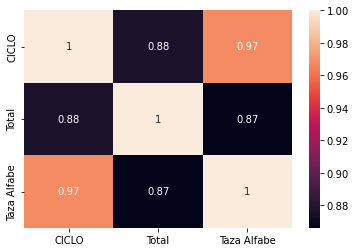

In [68]:
correlation_mat = df_new.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

### Conclusión:

Como vimos en los gráficos el presupuesto en la educación pública tiene fuerte relación en la mejora de taza de alfabetización a simple vista, esto se puede deducir fácilmente por experiencia y lógica, pero es importante aclara que el manejo correcto del presupuesto es el que marca la pauta  ante el logro de objetivos o metas ya que sin un buen manejo del presupuesto se perderá dinero y no se alcanzaran marca deseada o pronosticada, el tema tiene mucha importancia ya que de este se puede derivar temas de optimización o evaluación de acciones y si vamos al fondo podemos enfocarnos a punto de fortalecimiento e inversión que tenga gran impacto en la sociedad (teniendo un bueno conocimiento del entorno y su carencias).
